# 自訂(Custom) Callback

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist


# 匯入 MNIST 手寫阿拉伯數字 訓練資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()


# 訓練/測試資料的 X/y 維度
x_train.shape, y_train.shape,x_test.shape, y_test.shape

# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

In [2]:
# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])


In [3]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## 各種事件測試

In [6]:
class CustomCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.task_type=''
        self.epoch=0
        self.batch=0
        
    def on_train_begin(self, logs=None):
        self.task_type='訓練'
        print("訓練開始...")

    def on_train_end(self, logs=None):
        print("訓練結束.")

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch=epoch
        print(f"{self.task_type}第 {epoch} 執行週期開始...")

    def on_epoch_end(self, epoch, logs=None):
        print(f"{self.task_type}第 {epoch} 執行週期結束.")

    def on_test_begin(self, logs=None):
        self.task_type='測試'
        print("測試開始...")

    def on_test_end(self, logs=None):
        print("測試結束.")

    def on_predict_begin(self, logs=None):
        self.task_type='預測'
        print("預測開始...")

    def on_predict_end(self, logs=None):
        print("預測結束.")

    def on_train_batch_begin(self, batch, logs=None):
        print(f"訓練 第 {self.epoch} 執行週期, 第 {batch} 批次開始...")

    def on_train_batch_end(self, batch, logs=None):
        print(f"訓練 第 {self.epoch} 執行週期, 第 {batch} 批次結束.")

    def on_test_batch_begin(self, batch, logs=None):
        print(f"測試 第 {self.epoch} 執行週期, 第 {batch} 批次開始...")

    def on_test_batch_end(self, batch, logs=None):
        print(f"測試 第 {self.epoch} 執行週期, 第 {batch} 批次結束.")

    def on_predict_batch_begin(self, batch, logs=None):
        print(f"預測 第 {self.epoch} 執行週期, 第 {batch} 批次開始...")

    def on_predict_batch_end(self, batch, logs=None):
        print(f"預測 第 {self.epoch} 執行週期, 第 {batch} 批次結束.")


In [7]:
# 訓練
model.fit(x_train_norm, y_train, epochs=5, batch_size=256, verbose=0, validation_split=0.2, callbacks=[CustomCallback()])

訓練開始...
訓練第 0 執行週期開始...
訓練 第 0 執行週期, 第 0 批次開始...
訓練 第 0 執行週期, 第 0 批次結束.
訓練 第 0 執行週期, 第 1 批次開始...
訓練 第 0 執行週期, 第 1 批次結束.
訓練 第 0 執行週期, 第 2 批次開始...
訓練 第 0 執行週期, 第 2 批次結束.
訓練 第 0 執行週期, 第 3 批次開始...
訓練 第 0 執行週期, 第 3 批次結束.
訓練 第 0 執行週期, 第 4 批次開始...
訓練 第 0 執行週期, 第 4 批次結束.
訓練 第 0 執行週期, 第 5 批次開始...
訓練 第 0 執行週期, 第 5 批次結束.
訓練 第 0 執行週期, 第 6 批次開始...
訓練 第 0 執行週期, 第 6 批次結束.
訓練 第 0 執行週期, 第 7 批次開始...
訓練 第 0 執行週期, 第 7 批次結束.
訓練 第 0 執行週期, 第 8 批次開始...
訓練 第 0 執行週期, 第 8 批次結束.
訓練 第 0 執行週期, 第 9 批次開始...
訓練 第 0 執行週期, 第 9 批次結束.
訓練 第 0 執行週期, 第 10 批次開始...
訓練 第 0 執行週期, 第 10 批次結束.
訓練 第 0 執行週期, 第 11 批次開始...
訓練 第 0 執行週期, 第 11 批次結束.
訓練 第 0 執行週期, 第 12 批次開始...
訓練 第 0 執行週期, 第 12 批次結束.
訓練 第 0 執行週期, 第 13 批次開始...
訓練 第 0 執行週期, 第 13 批次結束.
訓練 第 0 執行週期, 第 14 批次開始...
訓練 第 0 執行週期, 第 14 批次結束.
訓練 第 0 執行週期, 第 15 批次開始...
訓練 第 0 執行週期, 第 15 批次結束.
訓練 第 0 執行週期, 第 16 批次開始...
訓練 第 0 執行週期, 第 16 批次結束.
訓練 第 0 執行週期, 第 17 批次開始...
訓練 第 0 執行週期, 第 17 批次結束.
訓練 第 0 執行週期, 第 18 批次開始...
訓練 第 0 執行週期, 第 18 批次結束.
訓練 第 0 執行週期, 第 19 批次開始...
訓練 第 0 執行週期, 第 19 批次

訓練 第 0 執行週期, 第 171 批次結束.
訓練 第 0 執行週期, 第 172 批次開始...
訓練 第 0 執行週期, 第 172 批次結束.
訓練 第 0 執行週期, 第 173 批次開始...
訓練 第 0 執行週期, 第 173 批次結束.
訓練 第 0 執行週期, 第 174 批次開始...
訓練 第 0 執行週期, 第 174 批次結束.
訓練 第 0 執行週期, 第 175 批次開始...
訓練 第 0 執行週期, 第 175 批次結束.
訓練 第 0 執行週期, 第 176 批次開始...
訓練 第 0 執行週期, 第 176 批次結束.
訓練 第 0 執行週期, 第 177 批次開始...
訓練 第 0 執行週期, 第 177 批次結束.
訓練 第 0 執行週期, 第 178 批次開始...
訓練 第 0 執行週期, 第 178 批次結束.
訓練 第 0 執行週期, 第 179 批次開始...
訓練 第 0 執行週期, 第 179 批次結束.
訓練 第 0 執行週期, 第 180 批次開始...
訓練 第 0 執行週期, 第 180 批次結束.
訓練 第 0 執行週期, 第 181 批次開始...
訓練 第 0 執行週期, 第 181 批次結束.
訓練 第 0 執行週期, 第 182 批次開始...
訓練 第 0 執行週期, 第 182 批次結束.
訓練 第 0 執行週期, 第 183 批次開始...
訓練 第 0 執行週期, 第 183 批次結束.
訓練 第 0 執行週期, 第 184 批次開始...
訓練 第 0 執行週期, 第 184 批次結束.
訓練 第 0 執行週期, 第 185 批次開始...
訓練 第 0 執行週期, 第 185 批次結束.
訓練 第 0 執行週期, 第 186 批次開始...
訓練 第 0 執行週期, 第 186 批次結束.
訓練 第 0 執行週期, 第 187 批次開始...
訓練 第 0 執行週期, 第 187 批次結束.
測試開始...
測試 第 0 執行週期, 第 0 批次開始...
測試 第 0 執行週期, 第 0 批次結束.
測試 第 0 執行週期, 第 1 批次開始...
測試 第 0 執行週期, 第 1 批次結束.
測試 第 0 執行週期, 第 2 批次開始...
測試 第 0 執行週期, 第

訓練 第 1 執行週期, 第 120 批次結束.
訓練 第 1 執行週期, 第 121 批次開始...
訓練 第 1 執行週期, 第 121 批次結束.
訓練 第 1 執行週期, 第 122 批次開始...
訓練 第 1 執行週期, 第 122 批次結束.
訓練 第 1 執行週期, 第 123 批次開始...
訓練 第 1 執行週期, 第 123 批次結束.
訓練 第 1 執行週期, 第 124 批次開始...
訓練 第 1 執行週期, 第 124 批次結束.
訓練 第 1 執行週期, 第 125 批次開始...
訓練 第 1 執行週期, 第 125 批次結束.
訓練 第 1 執行週期, 第 126 批次開始...
訓練 第 1 執行週期, 第 126 批次結束.
訓練 第 1 執行週期, 第 127 批次開始...
訓練 第 1 執行週期, 第 127 批次結束.
訓練 第 1 執行週期, 第 128 批次開始...
訓練 第 1 執行週期, 第 128 批次結束.
訓練 第 1 執行週期, 第 129 批次開始...
訓練 第 1 執行週期, 第 129 批次結束.
訓練 第 1 執行週期, 第 130 批次開始...
訓練 第 1 執行週期, 第 130 批次結束.
訓練 第 1 執行週期, 第 131 批次開始...
訓練 第 1 執行週期, 第 131 批次結束.
訓練 第 1 執行週期, 第 132 批次開始...
訓練 第 1 執行週期, 第 132 批次結束.
訓練 第 1 執行週期, 第 133 批次開始...
訓練 第 1 執行週期, 第 133 批次結束.
訓練 第 1 執行週期, 第 134 批次開始...
訓練 第 1 執行週期, 第 134 批次結束.
訓練 第 1 執行週期, 第 135 批次開始...
訓練 第 1 執行週期, 第 135 批次結束.
訓練 第 1 執行週期, 第 136 批次開始...
訓練 第 1 執行週期, 第 136 批次結束.
訓練 第 1 執行週期, 第 137 批次開始...
訓練 第 1 執行週期, 第 137 批次結束.
訓練 第 1 執行週期, 第 138 批次開始...
訓練 第 1 執行週期, 第 138 批次結束.
訓練 第 1 執行週期, 第 139 批次開始...
訓練 第 1 執行週期,

訓練 第 2 執行週期, 第 69 批次結束.
訓練 第 2 執行週期, 第 70 批次開始...
訓練 第 2 執行週期, 第 70 批次結束.
訓練 第 2 執行週期, 第 71 批次開始...
訓練 第 2 執行週期, 第 71 批次結束.
訓練 第 2 執行週期, 第 72 批次開始...
訓練 第 2 執行週期, 第 72 批次結束.
訓練 第 2 執行週期, 第 73 批次開始...
訓練 第 2 執行週期, 第 73 批次結束.
訓練 第 2 執行週期, 第 74 批次開始...
訓練 第 2 執行週期, 第 74 批次結束.
訓練 第 2 執行週期, 第 75 批次開始...
訓練 第 2 執行週期, 第 75 批次結束.
訓練 第 2 執行週期, 第 76 批次開始...
訓練 第 2 執行週期, 第 76 批次結束.
訓練 第 2 執行週期, 第 77 批次開始...
訓練 第 2 執行週期, 第 77 批次結束.
訓練 第 2 執行週期, 第 78 批次開始...
訓練 第 2 執行週期, 第 78 批次結束.
訓練 第 2 執行週期, 第 79 批次開始...
訓練 第 2 執行週期, 第 79 批次結束.
訓練 第 2 執行週期, 第 80 批次開始...
訓練 第 2 執行週期, 第 80 批次結束.
訓練 第 2 執行週期, 第 81 批次開始...
訓練 第 2 執行週期, 第 81 批次結束.
訓練 第 2 執行週期, 第 82 批次開始...
訓練 第 2 執行週期, 第 82 批次結束.
訓練 第 2 執行週期, 第 83 批次開始...
訓練 第 2 執行週期, 第 83 批次結束.
訓練 第 2 執行週期, 第 84 批次開始...
訓練 第 2 執行週期, 第 84 批次結束.
訓練 第 2 執行週期, 第 85 批次開始...
訓練 第 2 執行週期, 第 85 批次結束.
訓練 第 2 執行週期, 第 86 批次開始...
訓練 第 2 執行週期, 第 86 批次結束.
訓練 第 2 執行週期, 第 87 批次開始...
訓練 第 2 執行週期, 第 87 批次結束.
訓練 第 2 執行週期, 第 88 批次開始...
訓練 第 2 執行週期, 第 88 批次結束.
訓練 第 2 執行週期, 第 89 批次開始...


訓練 第 3 執行週期, 第 17 批次結束.
訓練 第 3 執行週期, 第 18 批次開始...
訓練 第 3 執行週期, 第 18 批次結束.
訓練 第 3 執行週期, 第 19 批次開始...
訓練 第 3 執行週期, 第 19 批次結束.
訓練 第 3 執行週期, 第 20 批次開始...
訓練 第 3 執行週期, 第 20 批次結束.
訓練 第 3 執行週期, 第 21 批次開始...
訓練 第 3 執行週期, 第 21 批次結束.
訓練 第 3 執行週期, 第 22 批次開始...
訓練 第 3 執行週期, 第 22 批次結束.
訓練 第 3 執行週期, 第 23 批次開始...
訓練 第 3 執行週期, 第 23 批次結束.
訓練 第 3 執行週期, 第 24 批次開始...
訓練 第 3 執行週期, 第 24 批次結束.
訓練 第 3 執行週期, 第 25 批次開始...
訓練 第 3 執行週期, 第 25 批次結束.
訓練 第 3 執行週期, 第 26 批次開始...
訓練 第 3 執行週期, 第 26 批次結束.
訓練 第 3 執行週期, 第 27 批次開始...
訓練 第 3 執行週期, 第 27 批次結束.
訓練 第 3 執行週期, 第 28 批次開始...
訓練 第 3 執行週期, 第 28 批次結束.
訓練 第 3 執行週期, 第 29 批次開始...
訓練 第 3 執行週期, 第 29 批次結束.
訓練 第 3 執行週期, 第 30 批次開始...
訓練 第 3 執行週期, 第 30 批次結束.
訓練 第 3 執行週期, 第 31 批次開始...
訓練 第 3 執行週期, 第 31 批次結束.
訓練 第 3 執行週期, 第 32 批次開始...
訓練 第 3 執行週期, 第 32 批次結束.
訓練 第 3 執行週期, 第 33 批次開始...
訓練 第 3 執行週期, 第 33 批次結束.
訓練 第 3 執行週期, 第 34 批次開始...
訓練 第 3 執行週期, 第 34 批次結束.
訓練 第 3 執行週期, 第 35 批次開始...
訓練 第 3 執行週期, 第 35 批次結束.
訓練 第 3 執行週期, 第 36 批次開始...
訓練 第 3 執行週期, 第 36 批次結束.
訓練 第 3 執行週期, 第 37 批次開始...


測試 第 3 執行週期, 第 15 批次結束.
測試 第 3 執行週期, 第 16 批次開始...
測試 第 3 執行週期, 第 16 批次結束.
測試 第 3 執行週期, 第 17 批次開始...
測試 第 3 執行週期, 第 17 批次結束.
測試 第 3 執行週期, 第 18 批次開始...
測試 第 3 執行週期, 第 18 批次結束.
測試 第 3 執行週期, 第 19 批次開始...
測試 第 3 執行週期, 第 19 批次結束.
測試 第 3 執行週期, 第 20 批次開始...
測試 第 3 執行週期, 第 20 批次結束.
測試 第 3 執行週期, 第 21 批次開始...
測試 第 3 執行週期, 第 21 批次結束.
測試 第 3 執行週期, 第 22 批次開始...
測試 第 3 執行週期, 第 22 批次結束.
測試 第 3 執行週期, 第 23 批次開始...
測試 第 3 執行週期, 第 23 批次結束.
測試 第 3 執行週期, 第 24 批次開始...
測試 第 3 執行週期, 第 24 批次結束.
測試 第 3 執行週期, 第 25 批次開始...
測試 第 3 執行週期, 第 25 批次結束.
測試 第 3 執行週期, 第 26 批次開始...
測試 第 3 執行週期, 第 26 批次結束.
測試 第 3 執行週期, 第 27 批次開始...
測試 第 3 執行週期, 第 27 批次結束.
測試 第 3 執行週期, 第 28 批次開始...
測試 第 3 執行週期, 第 28 批次結束.
測試 第 3 執行週期, 第 29 批次開始...
測試 第 3 執行週期, 第 29 批次結束.
測試 第 3 執行週期, 第 30 批次開始...
測試 第 3 執行週期, 第 30 批次結束.
測試 第 3 執行週期, 第 31 批次開始...
測試 第 3 執行週期, 第 31 批次結束.
測試 第 3 執行週期, 第 32 批次開始...
測試 第 3 執行週期, 第 32 批次結束.
測試 第 3 執行週期, 第 33 批次開始...
測試 第 3 執行週期, 第 33 批次結束.
測試 第 3 執行週期, 第 34 批次開始...
測試 第 3 執行週期, 第 34 批次結束.
測試 第 3 執行週期, 第 35 批次開始...


訓練 第 4 執行週期, 第 156 批次結束.
訓練 第 4 執行週期, 第 157 批次開始...
訓練 第 4 執行週期, 第 157 批次結束.
訓練 第 4 執行週期, 第 158 批次開始...
訓練 第 4 執行週期, 第 158 批次結束.
訓練 第 4 執行週期, 第 159 批次開始...
訓練 第 4 執行週期, 第 159 批次結束.
訓練 第 4 執行週期, 第 160 批次開始...
訓練 第 4 執行週期, 第 160 批次結束.
訓練 第 4 執行週期, 第 161 批次開始...
訓練 第 4 執行週期, 第 161 批次結束.
訓練 第 4 執行週期, 第 162 批次開始...
訓練 第 4 執行週期, 第 162 批次結束.
訓練 第 4 執行週期, 第 163 批次開始...
訓練 第 4 執行週期, 第 163 批次結束.
訓練 第 4 執行週期, 第 164 批次開始...
訓練 第 4 執行週期, 第 164 批次結束.
訓練 第 4 執行週期, 第 165 批次開始...
訓練 第 4 執行週期, 第 165 批次結束.
訓練 第 4 執行週期, 第 166 批次開始...
訓練 第 4 執行週期, 第 166 批次結束.
訓練 第 4 執行週期, 第 167 批次開始...
訓練 第 4 執行週期, 第 167 批次結束.
訓練 第 4 執行週期, 第 168 批次開始...
訓練 第 4 執行週期, 第 168 批次結束.
訓練 第 4 執行週期, 第 169 批次開始...
訓練 第 4 執行週期, 第 169 批次結束.
訓練 第 4 執行週期, 第 170 批次開始...
訓練 第 4 執行週期, 第 170 批次結束.
訓練 第 4 執行週期, 第 171 批次開始...
訓練 第 4 執行週期, 第 171 批次結束.
訓練 第 4 執行週期, 第 172 批次開始...
訓練 第 4 執行週期, 第 172 批次結束.
訓練 第 4 執行週期, 第 173 批次開始...
訓練 第 4 執行週期, 第 173 批次結束.
訓練 第 4 執行週期, 第 174 批次開始...
訓練 第 4 執行週期, 第 174 批次結束.
訓練 第 4 執行週期, 第 175 批次開始...
訓練 第 4 執行週期,

In [9]:
# 測試
model.evaluate(
    x_test_norm, y_test, batch_size=128, verbose=0, callbacks=[CustomCallback()]
)

# 預測
model.predict(x_test_norm, batch_size=128, callbacks=[CustomCallback()])

測試開始...
測試 第 0 執行週期, 第 0 批次開始...
測試 第 0 執行週期, 第 0 批次結束.
測試 第 0 執行週期, 第 1 批次開始...
測試 第 0 執行週期, 第 1 批次結束.
測試 第 0 執行週期, 第 2 批次開始...
測試 第 0 執行週期, 第 2 批次結束.
測試 第 0 執行週期, 第 3 批次開始...
測試 第 0 執行週期, 第 3 批次結束.
測試 第 0 執行週期, 第 4 批次開始...
測試 第 0 執行週期, 第 4 批次結束.
測試 第 0 執行週期, 第 5 批次開始...
測試 第 0 執行週期, 第 5 批次結束.
測試 第 0 執行週期, 第 6 批次開始...
測試 第 0 執行週期, 第 6 批次結束.
測試 第 0 執行週期, 第 7 批次開始...
測試 第 0 執行週期, 第 7 批次結束.
測試 第 0 執行週期, 第 8 批次開始...
測試 第 0 執行週期, 第 8 批次結束.
測試 第 0 執行週期, 第 9 批次開始...
測試 第 0 執行週期, 第 9 批次結束.
測試 第 0 執行週期, 第 10 批次開始...
測試 第 0 執行週期, 第 10 批次結束.
測試 第 0 執行週期, 第 11 批次開始...
測試 第 0 執行週期, 第 11 批次結束.
測試 第 0 執行週期, 第 12 批次開始...
測試 第 0 執行週期, 第 12 批次結束.
測試 第 0 執行週期, 第 13 批次開始...
測試 第 0 執行週期, 第 13 批次結束.
測試 第 0 執行週期, 第 14 批次開始...
測試 第 0 執行週期, 第 14 批次結束.
測試 第 0 執行週期, 第 15 批次開始...
測試 第 0 執行週期, 第 15 批次結束.
測試 第 0 執行週期, 第 16 批次開始...
測試 第 0 執行週期, 第 16 批次結束.
測試 第 0 執行週期, 第 17 批次開始...
測試 第 0 執行週期, 第 17 批次結束.
測試 第 0 執行週期, 第 18 批次開始...
測試 第 0 執行週期, 第 18 批次結束.
測試 第 0 執行週期, 第 19 批次開始...
測試 第 0 執行週期, 第 19 批次結束.
測試 第 0 執行週期,

array([[9.2751097e-06, 9.0833517e-08, 1.3045738e-04, ..., 9.9476826e-01,
        6.6744915e-06, 5.5761426e-05],
       [1.9663898e-06, 1.4094762e-04, 9.9971443e-01, ..., 3.9559467e-11,
        5.3956472e-05, 2.2913000e-11],
       [2.1053033e-06, 9.9787331e-01, 3.2291372e-04, ..., 1.1796625e-03,
        4.1355644e-04, 3.5646406e-06],
       ...,
       [1.5385998e-09, 9.4169978e-09, 2.0729106e-08, ..., 1.6793148e-05,
        3.8036942e-05, 2.0403706e-03],
       [2.4101419e-09, 4.5604617e-07, 2.6845285e-11, ..., 3.0056910e-08,
        1.2507952e-04, 9.8654451e-10],
       [6.6331349e-06, 4.4838369e-11, 2.3901032e-07, ..., 3.5724815e-11,
        4.3042391e-08, 4.5705773e-09]], dtype=float32)

## 收集訓練過程的損失

In [12]:
import pandas as pd

df = pd.DataFrame(columns=['epoch', 'batch', 'metrics'])

In [38]:
class CustomCallback_2(tf.keras.callbacks.Callback):
    def __init__(self):
        self.task_type=''
        self.epoch=0
        self.batch=0
        self.df = pd.DataFrame(columns=['epoch', 'batch', 'metrics'])
        
    def on_train_begin(self, logs=None):
        self.task_type='訓練'
        print("訓練開始...")

    def on_train_end(self, logs=None):
        print(self.df.shape)
        global df
        df = self.df
        print("訓練結束.")

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch=epoch
#         print(f"{self.task_type}第 {epoch} 執行週期開始...")

#     def on_epoch_end(self, epoch, logs=None):
#         print(f"{self.task_type}第 {epoch} 執行週期結束.")

#     def on_test_begin(self, logs=None):
#         self.task_type='測試'
#         print("測試開始...")

#     def on_test_end(self, logs=None):
#         print("測試結束.")

#     def on_predict_begin(self, logs=None):
#         self.task_type='預測'
#         print("預測開始...")

#     def on_predict_end(self, logs=None):
#         print("預測結束.")

#     def on_train_batch_begin(self, batch, logs=None):
#         print(f"訓練 第 {self.epoch} 執行週期, 第 {batch} 批次開始...")

    def on_train_batch_end(self, batch, logs=None):
        # 新增資料至 df2 DataFrame
#         print(f"訓練 第 {self.epoch} 執行週期, 第 {batch} 批次結束.")
#         df2 = pd.DataFrame([[self.epoch, self.batch, logs["loss"]]], columns=['epoch', 'batch', 'weight'])
#         df2 = pd.DataFrame([[self.epoch, self.batch, self.model.get_weights()]], columns=['epoch', 'batch', 'weight'])
        df2 = pd.DataFrame([[self.epoch, batch, logs["loss"]]], columns=['epoch', 'batch', 'metrics'])
        self.df = self.df.append(df2, ignore_index=True)

#     def on_test_batch_begin(self, batch, logs=None):
#         print(f"測試 第 {self.epoch} 執行週期, 第 {batch} 批次開始...")

#     def on_test_batch_end(self, batch, logs=None):
#         print(f"測試 第 {self.epoch} 執行週期, 第 {batch} 批次結束.")

#     def on_predict_batch_begin(self, batch, logs=None):
#         print(f"預測 第 {self.epoch} 執行週期, 第 {batch} 批次開始...")

#     def on_predict_batch_end(self, batch, logs=None):
#         print(f"預測 第 {self.epoch} 執行週期, 第 {batch} 批次結束.")


In [39]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [40]:
y_train_one_hot_encoding = tf.keras.utils.to_categorical(y_train)

In [51]:
model.fit(x_train_norm, y_train_one_hot_encoding, epochs=15, batch_size=256, verbose=0, validation_split=0.2, callbacks=[CustomCallback_2()])

訓練開始...
(2820, 3)
訓練結束.


In [52]:
df.head()

,epoch,batch,metrics
0,0,0,0.002023
1,0,1,0.003936
2,0,2,0.001028
3,0,3,0.001885
4,0,4,0.002188


In [53]:
# 取得最後一層的權重

# import numpy as np
# # weights
# np.array(df.loc[0,'metrics'])[-1].shape



"\nimport numpy as np\n# weights\nnp.array(df.loc[0,'metrics'])[-1].shape\n"

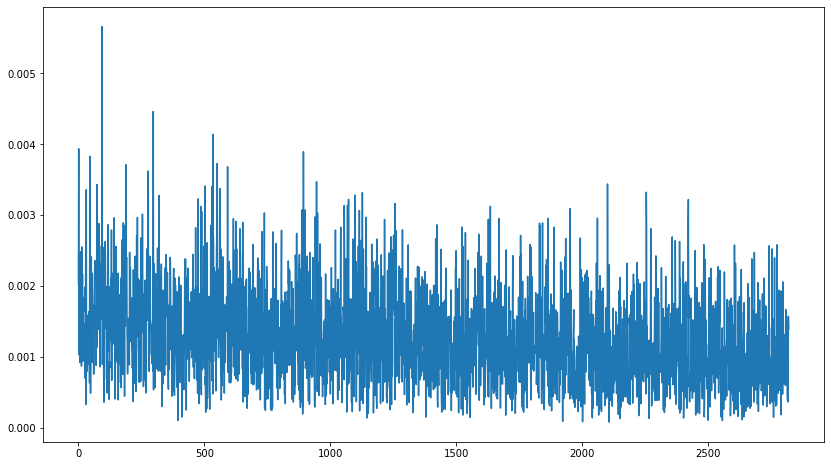

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.plot(df.metrics)

In [55]:
df.tail()

,epoch,batch,metrics
2815,14,183,0.000374
2816,14,184,0.001028
2817,14,185,0.000364
2818,14,186,0.001573
2819,14,187,0.001391


In [56]:
df2 = df.groupby(by='epoch').min()
df2

,batch,metrics
epoch,,
0,0,0.000327
1,0,0.000299
2,0,0.000102
3,0,0.000241
4,0,0.000193
5,0,0.000219
6,0,0.000137
7,0,0.000148
8,0,0.000143


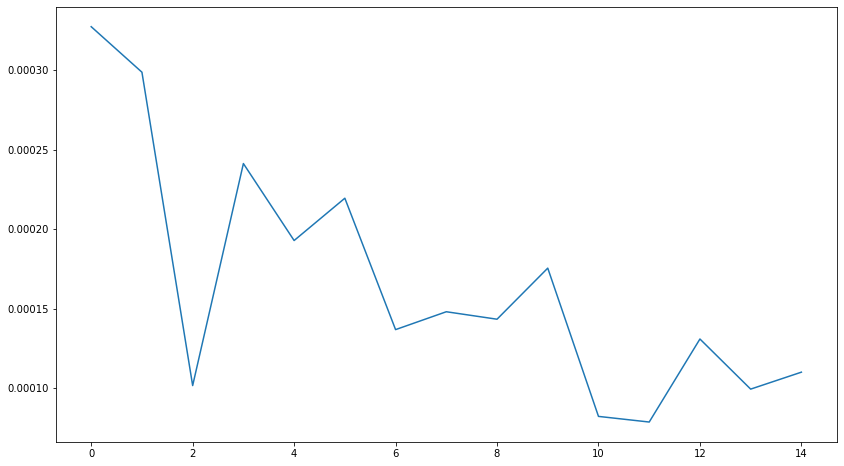

In [59]:
plt.figure(figsize=(14,8))
plt.plot(df2.index, df2.metrics)